# Objective  - Is to predict the Delivery time using Sorting time

### Importing necessary libraries in Python

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import time
print("Libraries importing is sucessful")

Libraries importing is sucessful


In [2]:
st = time.time()

### Loading the dataset

In [3]:
def load_dataset():
    try:
        data = pd.read_csv("D:/Top Mentor_Data analytics class/Delivery_prj1/delivery_time.csv")
        print("Data loading is sucessful")
        return (data)
    except Exception as e:
        print(e)

In [4]:
data = load_dataset()

Data loading is sucessful


### Data profiling

In [5]:
data.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
data.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [7]:
data.shape

(21, 2)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [10]:
data.duplicated().sum()

0

### Exploratory Data analysis

#### Summary statistics

In [11]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


#### Visualisations

##### Distribution of Delivery time

<Figure size 400x400 with 0 Axes>

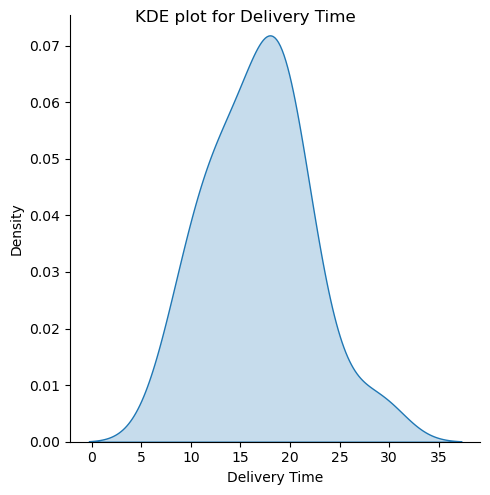

In [12]:
plt.figure(figsize = (4,4))
ax = sns.displot(data = data, x = 'Delivery Time', kind = 'kde', fill = True)
ax.fig.suptitle("KDE plot for Delivery Time")
plt.savefig("D:/Top Mentor_Data analytics class/Delivery_prj1/KDE_Delivery Time")
plt.show()

##### Distribution of sorting Time

<Figure size 400x400 with 0 Axes>

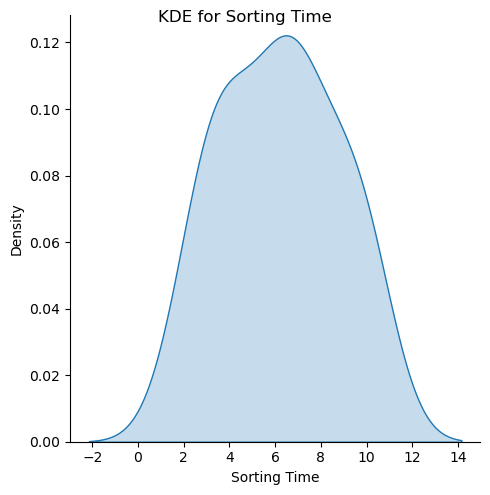

In [13]:
plt.figure(figsize = (4,4))
ax = sns.displot(data = data, x = 'Sorting Time', kind = 'kde', fill = True)
ax.fig.suptitle("KDE for Sorting Time")
plt.savefig("D:/Top Mentor_Data analytics class/Delivery_prj1/KDE_Sorting Time")
plt.show()

##### Scatter plot between Delivery Time and Sorting Time

<Figure size 600x400 with 0 Axes>

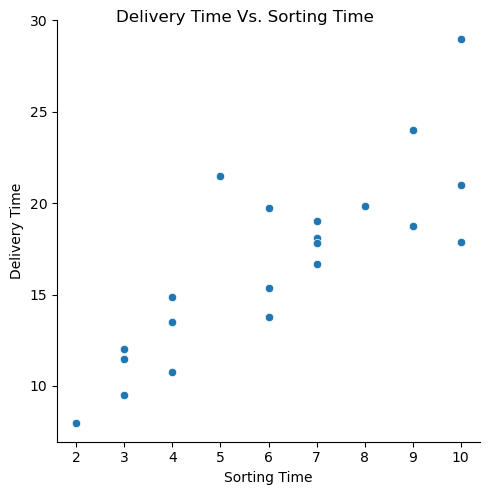

In [14]:
plt.figure(figsize = (6,4))
ax = sns.relplot(data = data, x = 'Sorting Time', y = 'Delivery Time')
ax.fig.suptitle("Delivery Time Vs. Sorting Time")
plt.savefig("D:/Top Mentor_Data analytics class/Delivery_prj1/Scatter plot")
plt.show()

### Linear Regression Model

#### Target and feature

In [15]:
X = data ['Sorting Time'].values.reshape(-1,1)
y = data ['Delivery Time'].values.reshape(-1,1)

In [16]:
X

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

In [17]:
y

array([[21.  ],
       [13.5 ],
       [19.75],
       [24.  ],
       [29.  ],
       [15.35],
       [19.  ],
       [ 9.5 ],
       [17.9 ],
       [18.75],
       [19.83],
       [10.75],
       [16.68],
       [11.5 ],
       [12.03],
       [14.88],
       [13.75],
       [18.11],
       [ 8.  ],
       [17.83],
       [21.5 ]])

#### Data splitting

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1234)

In [19]:
X_train.shape

(14, 1)

In [20]:
X_test.shape

(7, 1)

In [21]:
y_train.shape

(14, 1)

In [22]:
y_test.shape

(7, 1)

In [23]:
y_test

array([[24.  ],
       [11.5 ],
       [19.75],
       [13.75],
       [12.03],
       [15.35],
       [29.  ]])

#### Model development and training

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
coefficient = lr.coef_
intercept = lr.intercept_

In [28]:
coefficient

array([[1.32215881]])

In [29]:
intercept

array([8.01444169])

In [30]:
predict = lr.predict(X_test)
final_score  = r2_score(y_test,predict)

In [31]:
predict

array([[19.91387097],
       [11.98091811],
       [15.94739454],
       [15.94739454],
       [11.98091811],
       [15.94739454],
       [21.23602978]])

In [32]:
print ("The R-square value is: ", final_score)

The R-square value is:  0.6317084079204786


In [33]:
en = time.time()

print("The total time taken in seconds - ", (en - st))

The total time taken in seconds -  1.034804344177246


In [34]:
user_input = float(input("Enter the Sorting Time: "))
y = 8.01444169 + 1.32215881 *user_input 
print("The predicted delivery time is: ", y)

Enter the Sorting Time: 23.12
The predicted delivery time is:  38.5827533772
